In [1]:
pip install scikit-learn==1.2.2



  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.3 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.3 MB 958.5 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.3 MB 1.0 MB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.3 MB 1.0 MB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.3 MB 1.1 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.3 MB 1.1 MB/s eta 0:00:07
   -------- ------------------------------- 1.8/8.3 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.1/8.3 MB 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

# keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [5]:
# Load the dataset
data = pd.read_csv('train.csv')
data

,VWTI,SWTI,CWTI,EI,Class
0,2.263400,-4.4862,3.65580,-0.612510,0
1,3.271800,1.7837,2.11610,0.613340,0
2,-3.941100,-12.8792,13.05970,-3.312500,1
3,0.519500,-3.2633,3.08950,-0.984900,0
4,2.569800,-4.4076,5.98560,0.078002,0
...,...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240,0
1092,-0.048008,-1.6037,8.47560,0.755580,0
1093,2.942100,7.4101,-0.97709,-0.884060,0
1094,1.964700,6.9383,0.57722,0.663770,0


In [6]:
X =  data.drop('Class',axis=1)
y = data['Class']

y

0       0
1       0
2       1
3       0
4       0
       ..
1091    0
1092    0
1093    0
1094    0
1095    0
Name: Class, Length: 1096, dtype: int64

In [7]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [9]:
# scalling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

y_train = y_train.values
y_val = y_val.values
y_test  = y_test.values

#check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")





X_train shape: (700, 4), y_train shape: (700,)
X_val shape: (176, 4), y_val shape: (176,)
X_test shape: (220, 4), y_test shape: (220,)


In [10]:
X_train.shape[1]

4

In [11]:
#Define the model
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),# input layer
    Dropout(0.3) ,#Dropout to reduce overfitting
    Dense(32,activation='relu'),
    Dropout(0.3),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
    
    
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainabl

In [12]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    epochs= 15,
    batch_size = 12,
    callbacks=[early_stopping]
)

Epoch 1/15
59/59 [==============================] - 4s 16ms/step - loss: 0.6395 - accuracy: 0.6714 - val_loss: 0.5527 - val_accuracy: 0.8807
Epoch 2/15
59/59 [==============================] - 1s 10ms/step - loss: 0.4513 - accuracy: 0.8743 - val_loss: 0.2873 - val_accuracy: 0.9318
Epoch 3/15
59/59 [==============================] - 0s 7ms/step - loss: 0.2089 - accuracy: 0.9400 - val_loss: 0.0909 - val_accuracy: 0.9659
Epoch 4/15
59/59 [==============================] - 1s 11ms/step - loss: 0.0976 - accuracy: 0.9671 - val_loss: 0.0519 - val_accuracy: 0.9830
Epoch 5/15
59/59 [==============================] - 1s 11ms/step - loss: 0.0751 - accuracy: 0.9714 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 6/15
59/59 [==============================] - 0s 8ms/step - loss: 0.0573 - accuracy: 0.9786 - val_loss: 0.0250 - val_accuracy: 0.9943
Epoch 7/15
59/59 [==============================] - 0s 6ms/step - loss: 0.0532 - accuracy: 0.9814 - val_loss: 0.0209 - val_accuracy: 0.9943
Epoch 8/15
59/59

In [13]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000


[0.0053387414664030075, 1.0]

In [14]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test,y_pred))

7/7 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        85

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [15]:
pip install seaborn==0.12.2


Note: you may need to restart the kernel to use updated packages.


<function matplotlib.pyplot.show(close=None, block=None)>

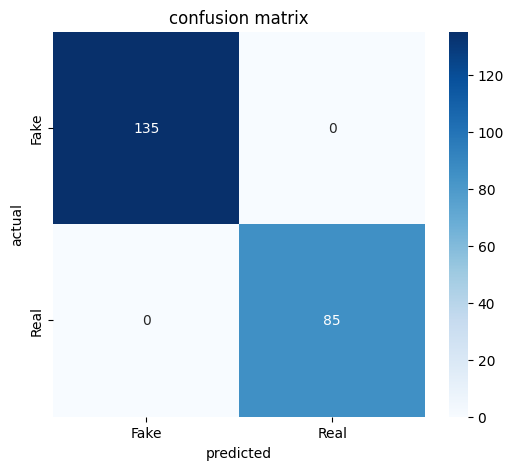

In [16]:
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues', xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("confusion matrix")
plt.show

In [17]:
def make_prediction(input_data):
    input_data_scaled = scaler.transform(input_data)

    predictions = model.predict(input_data_scaled) 

    predicted_class = ( predictions > 0.5).astype(int)

    if   predicted_class[0] == 1:
        return "Real Note"
    else:
        return "Fake Note"        

In [18]:
# Example input data for predictionk (replace with actual form or array)
input_data = np.array([[-3.9411,-12.8792,13.0597,-3.3125]])

# Get the prediction
result = make_prediction(input_data)
print(result)

C:\Users\admin\Desktop\Real Banknote prediction\ni\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
Real Note


In [19]:
import pickle

model.save('models/model.h5')
# save the scaler using pickle
with open('models/scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file)